# NMP Plots and Visualizations

This notebook contains plots and visualizations for the NMP guide.


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


## Brain Development: Limbic System vs Prefrontal Cortex

This visualization shows the developmental timeline of the limbic system (emotions) versus the prefrontal cortex (regulation/executive function).


In [12]:
# Create DataFrame with brain development data
data = {
    'Age (Years)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    'Limbic System Development (%)': [0, 0.15, 0.28, 0.4, 0.51, 0.61, 0.7, 0.77, 0.83, 0.88, 0.92, 0.95, 0.97, 0.98, 0.99, 0.995, 0.997, 0.998, 0.999, 0.999, 1, 1, 1, 1, 1, 1],
    'Prefrontal Cortex Development (%)': [0, 0.1, 0.18, 0.25, 0.32, 0.38, 0.44, 0.5, 0.55, 0.6, 0.65, 0.69, 0.73, 0.76, 0.79, 0.82, 0.85, 0.87, 0.89, 0.91, 0.93, 0.95, 0.96, 0.97, 0.98, 1]
}

df = pd.DataFrame(data)
df.head(10)


,Age (Years),Limbic System Development (%),Prefrontal Cortex Development (%)
0,0,0.00,0.00
1,1,0.15,0.10
2,2,0.28,0.18
3,3,0.40,0.25
4,4,0.51,0.32
5,5,0.61,0.38
6,6,0.70,0.44
7,7,0.77,0.50
8,8,0.83,0.55
9,9,0.88,0.60


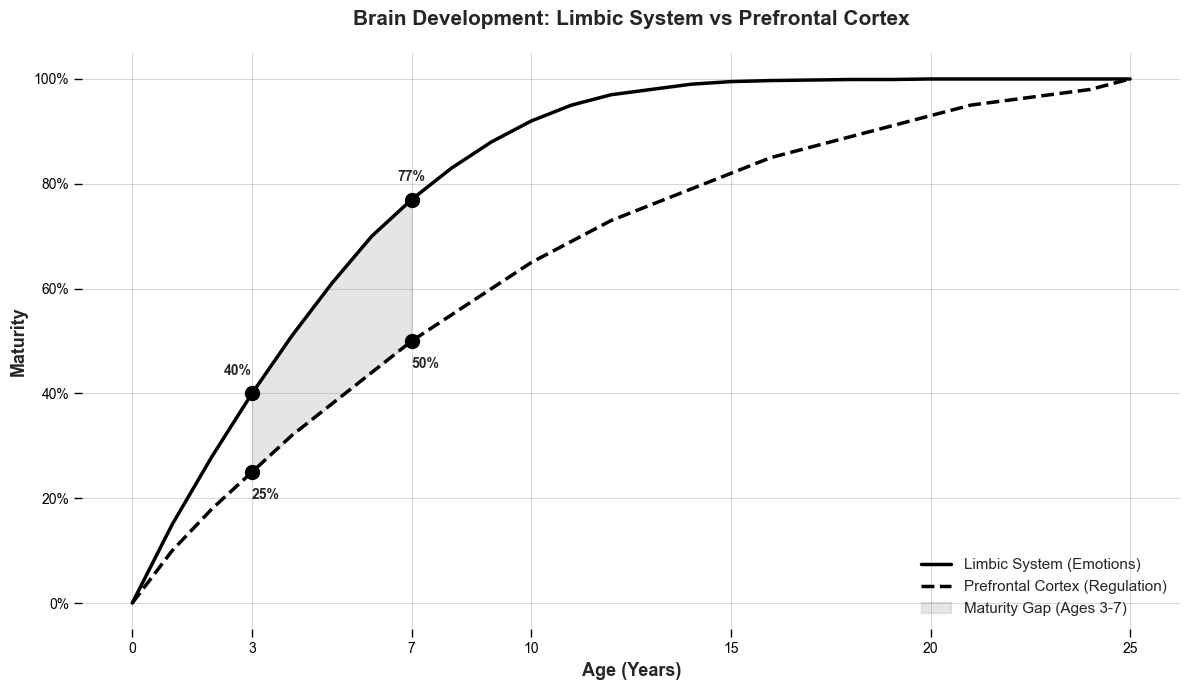

In [38]:
# Create the plot with white background
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
ax.set_facecolor('white')

# Convert percentages to 0-100 scale for better readability
# Upper line (Limbic System) - solid black line
ax.plot(df['Age (Years)'], df['Limbic System Development (%)'] * 100, 
        linewidth=2.5, label='Limbic System (Emotions)', color='black', linestyle='-')
# Lower line (Prefrontal Cortex) - dashed black line
ax.plot(df['Age (Years)'], df['Prefrontal Cortex Development (%)'] * 100, 
        linewidth=2.5, label='Prefrontal Cortex (Regulation)', color='black', linestyle='--')

# Shade the area between lines ONLY between ages 3 and 7
age_mask = (df['Age (Years)'] >= 3) & (df['Age (Years)'] <= 7)
ages_3_to_7 = df.loc[age_mask, 'Age (Years)']
limbic_3_to_7 = df.loc[age_mask, 'Limbic System Development (%)'] * 100
prefrontal_3_to_7 = df.loc[age_mask, 'Prefrontal Cortex Development (%)'] * 100

ax.fill_between(ages_3_to_7, limbic_3_to_7, prefrontal_3_to_7,
                alpha=0.2, color='gray', label='Maturity Gap (Ages 3-7)')

# Add markers at the four corners of the shaded area
# Get values at age 3 and 7
limbic_at_3 = df.loc[df['Age (Years)'] == 3, 'Limbic System Development (%)'].values[0] * 100
prefrontal_at_3 = df.loc[df['Age (Years)'] == 3, 'Prefrontal Cortex Development (%)'].values[0] * 100
limbic_at_7 = df.loc[df['Age (Years)'] == 7, 'Limbic System Development (%)'].values[0] * 100
prefrontal_at_7 = df.loc[df['Age (Years)'] == 7, 'Prefrontal Cortex Development (%)'].values[0] * 100

# Plot markers at the four corners
ax.plot(3, limbic_at_3, 'o', color='black', markersize=10, zorder=5)
ax.plot(3, prefrontal_at_3, 'o', color='black', markersize=10, zorder=5)
ax.plot(7, limbic_at_7, 'o', color='black', markersize=10, zorder=5)
ax.plot(7, prefrontal_at_7, 'o', color='black', markersize=10, zorder=5)

# Top left corner (age 3, limbic) - position above the marker
ax.text(3, limbic_at_3 + 3, f'{limbic_at_3:.0f}%', fontsize=10, fontweight='bold', 
        va='bottom', ha='right')

# Bottom left corner (age 3, prefrontal) - position below the marker
ax.text(3, prefrontal_at_3 - 3, f'{prefrontal_at_3:.0f}%', fontsize=10, fontweight='bold', 
        va='top', ha='left')

# Top right corner (age 7, limbic) - position above the marker
ax.text(7, limbic_at_7 + 3, f'{limbic_at_7:.0f}%', fontsize=10, fontweight='bold', 
        va='bottom', ha='center')

# Bottom right corner (age 7, prefrontal) - position below the marker
ax.text(7, prefrontal_at_7 - 3, f'{prefrontal_at_7:.0f}%', fontsize=10, fontweight='bold', 
        va='top', ha='left')

# Customize the plot
ax.set_xlabel('Age (Years)', fontsize=13, fontweight='bold')
ax.set_ylabel('Maturity', fontsize=13, fontweight='bold')
ax.set_title('Brain Development: Limbic System vs Prefrontal Cortex', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3, color='gray')

# Mark specific ages on x-axis: 0, 3, 7, 10, 15, 20, 25
ax.set_xticks([0, 3, 7, 10, 15, 20, 25])
ax.set_yticks(range(0, 101, 20))

# Format y-axis to show percentages
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 20)])
 
# Make tick marks visible
ax.tick_params(axis='both', which='both', direction='out', length=6, width=1, colors='black')

plt.tight_layout()
plt.show()
